# Keras


Tutorial: https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL

In this example, we'll predict whether a medicine has side effects on patients of different ages.
The hypothesis is that it normally has side effects on patients above 65 years old.

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import tensorflow

Using TensorFlow backend.


### Creating training data and preprocess

In [2]:
train_labels = []
train_samples = []

for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
train_labels  = np.array(train_labels)
train_samples = np.array(train_samples)
    
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples= scaler.fit_transform((train_samples).reshape(-1,1))

/Users/matias/.virtualenvs/yolo/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
print(train_labels)
print(train_samples)

[0 1 0 ... 0 1 0]
[ 36 100  43 ...  99  25  95]


### Create Neural Network

In [4]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),   #inputs arrays of (*,1) dimension, outputs (*,16)
    Dense(32, activation='relu'),  #inputs arrays of (*,1) dimension, outputs (*,16)
    Dense(2, activation='softmax')  #inputs arrays of (*,1) dimension, outputs (*,16)
])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Training

In [6]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 0s - loss: 0.6952 - acc: 0.4376
Epoch 2/20
 - 0s - loss: 0.6741 - acc: 0.5871
Epoch 3/20
 - 0s - loss: 0.6534 - acc: 0.6524
Epoch 4/20
 - 0s - loss: 0.6321 - acc: 0.7000
Epoch 5/20
 - 0s - loss: 0.6106 - acc: 0.7233
Epoch 6/20
 - 0s - loss: 0.5883 - acc: 0.7457
Epoch 7/20
 - 0s - loss: 0.5649 - acc: 0.7700
Epoch 8/20
 - 0s - loss: 0.5415 - acc: 0.7900
Epoch 9/20
 - 0s - loss: 0.5171 - acc: 0.8129
Epoch 10/20
 - 0s - loss: 0.4890 - acc: 0.8371
Epoch 11/20
 - 0s - loss: 0.4634 - acc: 0.8505
Epoch 12/20
 - 0s - loss: 0.4407 - acc: 0.8605
Epoch 13/20
 - 0s - loss: 0.4199 - acc: 0.8781
Epoch 14/20
 - 0s - loss: 0.4010 - acc: 0.8824
Epoch 15/20
 - 0s - loss: 0.3842 - acc: 0.8895
Epoch 16/20
 - 0s - loss: 0.3692 - acc: 0.8981
Epoch 17/20
 - 0s - loss: 0.3560 - acc: 0.9000
Epoch 18/20
 - 0s - loss: 0.3444 - acc: 0.9119
Epoch 19/20
 - 0s - loss: 0.3345 - acc: 0.9114
Epoch 20/20
 - 0s - loss: 0.3257 - acc: 0.9090


### Build validation set

In [7]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.2372 - acc: 0.9566 - val_loss: 1.0602 - val_acc: 0.5143
Epoch 2/20
 - 0s - loss: 0.2225 - acc: 0.9571 - val_loss: 1.1021 - val_acc: 0.5143
Epoch 3/20
 - 0s - loss: 0.2096 - acc: 0.9603 - val_loss: 1.1501 - val_acc: 0.5143
Epoch 4/20
 - 0s - loss: 0.1978 - acc: 0.9598 - val_loss: 1.1946 - val_acc: 0.5143
Epoch 5/20
 - 0s - loss: 0.1871 - acc: 0.9651 - val_loss: 1.2398 - val_acc: 0.5095
Epoch 6/20
 - 0s - loss: 0.1772 - acc: 0.9630 - val_loss: 1.2753 - val_acc: 0.5095
Epoch 7/20
 - 0s - loss: 0.1682 - acc: 0.9656 - val_loss: 1.3259 - val_acc: 0.5095
Epoch 8/20
 - 0s - loss: 0.1601 - acc: 0.9656 - val_loss: 1.3694 - val_acc: 0.5095
Epoch 9/20
 - 0s - loss: 0.1527 - acc: 0.9757 - val_loss: 1.4211 - val_acc: 0.5095
Epoch 10/20
 - 0s - loss: 0.1459 - acc: 0.9741 - val_loss: 1.4666 - val_acc: 0.5095
Epoch 11/20
 - 0s - loss: 0.1400 - acc: 0.9714 - val_loss: 1.5106 - val_acc: 0.5095
Epoch 12/20
 - 0s - loss: 0.1342 - acc

### Predict

#### creating test data

In [8]:
test_labels = []
test_samples = []

for i in range(1000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)
    
for i in range(50):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
test_labels  = np.array(test_labels)
test_samples = np.array(test_samples)
    
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples= scaler.fit_transform((test_samples).reshape(-1,1))

/Users/matias/.virtualenvs/yolo/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


#### predict

predicts probabilities:   
   - [x] 1st column is the probability of 0 
   - [x] 2nd column is the probability of 1
   

In [9]:
model.predict(scaled_test_samples, batch_size=10, verbose=0)

array([[0.99232906, 0.00767094],
       [0.01494118, 0.9850588 ],
       [0.984213  , 0.01578699],
       ...,
       [0.35966873, 0.64033127],
       [0.9924706 , 0.00752936],
       [0.31486243, 0.68513757]], dtype=float32)

predicts with classes:

In [10]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions

array([0, 1, 0, ..., 1, 0, 1])

### Confusion Matrix

In [11]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [12]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [13]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 979   71]
 [  49 1001]]


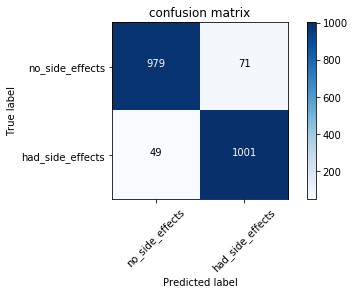

In [14]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels)

## Save

 ### 1. model.save()
 Save architechture, weights, state of the optimizer, training configuration

In [15]:
# save
model.save('medical_trial_model.h5')

# load

from keras.models import load_model

new_model = load_model('medical_trial_model.h5')

 ### 2. model.to_json()  or model.to_yaml()
 Save only architecture

In [16]:
# save
json_string = model.to_json()

# load

from keras.models import model_from_json

model_architecture = model_from_json(json_string)

 ### 3. model.save_weights()
Only weights

In [17]:
# save
model.save_weights('medical_trial_model_weights.h5')

# load: You'll need to create the architecture manually first and then load the weights
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model.load_weights('medical_trial_model_weights.h5')